# In this file we will

1. Perform I/O operations
2. Retrieve data from OpenStreetMap
3. Reproject geospatial data
4. Use basic geoprocessing tools from geopandas
5. Create basic plots of spatial data

In [1]:
# Import relevant libraries 

import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal
import pyproj
import geopy
import cartopy as cp
import geojson
import osmnx as ox
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import bokeh
import folium

/var/folders/v9/qdj2sw7n6316mgf6_n6f4w680000gn/T/ipykernel_37930/792534469.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas

## Read dataset containing health and socioeconomics statistics in Chicago (ComArea_ACS14_f.shp) from your working directory:

In [2]:
comA = gpd.read_file("./chicago_data/comarea/ComArea_ACS14_f.shp")

#### Inspect your gdf:
# Scroll through the columns in your gdf. The last column contains the geometry attribute.


In [19]:
comA.head()

,ComAreaID,community,TRACTCnt,shape_area,shape_len,Pop2012,Pop2014,PopChng,PopM,PopMP,...,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc,geometry
0,35,DOUGLAS,10,4.600462e+07,31027.054510,18238,19430,3.1645,8294,42.6866,...,13.4,74.5,85.5,62.1,482.2,0,1063.3,727.4,4.2,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,36,OAKLAND,3,1.691396e+07,19565.506153,5918,6473,4.4791,2499,38.6065,...,8.2,54.5,54.2,43.7,435.4,0,1655.4,1629.3,6.7,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,37,FULLER PARK,2,1.991670e+07,25339.089750,2876,2543,-6.1450,1218,47.8962,...,22.6,89.6,70.5,82.4,489.9,2,1061.9,1556.4,0.0,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,38,GRAND BOULEVARD,14,4.849250e+07,28196.837157,21929,22531,1.3540,9681,42.9675,...,12.1,63.8,39.0,46.7,590.4,1,1454.6,1680.0,13.2,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,39,KENWOOD,7,2.907174e+07,23325.167906,17841,18217,1.0428,8543,46.8958,...,8.9,49.1,46.2,31.5,397.9,0,610.2,549.1,0.0,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


## Inspect the 'geometry' attribute column:

In [9]:
comA['geometry'].head()

0    POLYGON ((-87.60914 41.84469, -87.60915 41.844...
1    POLYGON ((-87.59215 41.81693, -87.59231 41.816...
2    POLYGON ((-87.62880 41.80189, -87.62879 41.801...
3    POLYGON ((-87.60671 41.81681, -87.60670 41.816...
4    POLYGON ((-87.59215 41.81693, -87.59215 41.816...
Name: geometry, dtype: geometry

## Display the geometry of the fourth feature (i.e. index = 3) in the gdf:

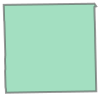

In [20]:
comA['geometry'][3]

## Display the other attributes of the same feature (i.e. index = 3):

In [14]:
comA.iloc[3]

ComAreaID                                                    38
community                                       GRAND BOULEVARD
TRACTCnt                                                     14
shape_area                                        48492503.1554
shape_len                                          28196.837157
                                    ...                        
ChlLeadP                                                      1
GonorrF                                                  1454.6
GonorrM                                                  1680.0
Tuberc                                                     13.2
geometry      POLYGON ((-87.60670812560372 41.81681377137391...
Name: 3, Length: 87, dtype: object

## * Fetching data from OpenStreetMap
# For more details, refer to: https://osmnx.readthedocs.io/en/stable/internals.html#osmnx-geocoder-module

# We can use the osmnx package to read data from OpenStreetMap to GeoDataFrames 

In [21]:
city_name = 'Chicago, Illinois'
city = ox.geocoder.geocode_to_gdf(city_name, which_result=1)

#### Now, do the same to fetch the boundary of the community you identified above:

In [22]:
community_name = 'GRAND BOULEVARD, Chicago' 
community = ox.geocoder.geocode_to_gdf(community_name, which_result=1)

#### Inspect your new community variable:

# ⓘ 
> This community area is part of the larger _Bronzeville_ area, an important center for African-American culture and businesses in Chicago. Bronzeville is also one of 10 priority communities selected as a part of the initial phase of a community development initiative by its Mayor.

In [23]:
community

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-87.62925 41.82367, -87.62891 41.803...",41.823932,41.801891,-87.60641,-87.629248,299254553,relation,9950092,41.813923,-87.617272,boundary,administrative,20,0.346844,quarter,Grand Boulevard,"Grand Boulevard, Chicago, Hyde Park Township, ..."


#### and display its geometry:



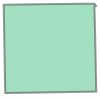

In [24]:
community['geometry'][0]

#### Apart from boundaries, you can also get other map features from OSM such as roads, building footprints, waterways etc.

See https://wiki.openstreetmap.org/wiki/Map_features for more information.

#### Now, let us try to fetch the building footprint of all residential buildings within Chicago city boundary:

We will include `'apartments', 'terrace', 'house', 'detached', 'semidetached_house'` as the building tags.

In [25]:
residential_chicago = ox.geometries.geometries_from_polygon(city['geometry'][0], tags = {'building': ['apartments', 'terrace', 'house', 'detached', 'semidetached_house']})

/var/folders/v9/qdj2sw7n6316mgf6_n6f4w680000gn/T/ipykernel_37930/3846232367.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  residential_chicago = ox.geometries.geometries_from_polygon(city['geometry'][0], tags = {'building': ['apartments', 'terrace', 'house', 'detached', 'semidetached_house']})
/Users/abhaykumar/anaconda3/envs/sds_python/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/abhaykumar/anaconda3/envs/sds_python/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/abhaykumar/anaconda3/envs/sds_python/lib/python3.10/site-packages/pygeos/predicates.py:76

#### Inspect the 'residential_chicago' gdf:

In [26]:
residential_chicago.head()

geometry  \
element_type osmid                                                         
way          31064516  POLYGON ((-87.62857 41.91079, -87.62844 41.910...   
             31065736  POLYGON ((-87.64017 41.90387, -87.64016 41.903...   
             35566516  POLYGON ((-87.66074 41.92484, -87.65907 41.924...   
             40785425  POLYGON ((-87.64951 41.88162, -87.64951 41.881...   
             74267847  POLYGON ((-87.63425 41.87675, -87.63425 41.876...   

                      amenity addr:city addr:housenumber addr:postcode  \
element_type osmid                                                       
way          31064516     NaN   Chicago             1555         60610   
             31065736     NaN   Chicago             1200         60610   
             35566516     NaN       NaN             1237           NaN   
             40785425     NaN   Chicago              855         60607   
             74267847     NaN   Chicago              235         60607   

                      addr:state            addr:street source disused:shop  \
element_type osmid                                                            
way          31064516         IL    North State Parkway    NaN          NaN   
             31065736         IL  North Clybourn Avenue    NaN          NaN   
             35566516        NaN  West Fullerton Avenue    NaN          NaN   
             40785425         IL    West Madison Street    NaN          NaN   
             74267847         IL  West Van Buren Street    NaN          NaN   

                                            name  ... consulate diplomatic  \
element_type osmid                                ...                        
way          31064516         Archbishop's House  ...       NaN        NaN   
             31065736              Clybourn 1200  ...       NaN        NaN   
             35566516                  1237 West  ...       NaN        NaN   
             40785425                      Porte  ...       NaN        NaN   
             74267847  235 West Van Buren Street  ...       NaN        NaN   

                      official_name target brand:wikipedia internet  \
element_type osmid                                                    
way          31064516           NaN    NaN             NaN      NaN   
             31065736           NaN    NaN             NaN      NaN   
             35566516           NaN    NaN             NaN      NaN   
             40785425           NaN    NaN             NaN      NaN   
             74267847           NaN    NaN             NaN      NaN   

                      contact:phone residential ways type  
element_type osmid                                         
way          31064516           NaN         NaN  NaN  NaN  
             31065736           NaN         NaN  NaN  NaN  
             35566516           NaN         NaN  NaN  NaN  
             40785425           NaN         NaN  NaN  NaN  
             74267847           NaN         NaN  NaN  NaN  

[5 rows x 128 columns]

###  Projections and coordinate reference systems (CRS)
For more details, refer to: https://geopandas.org/en/stable/docs/user_guide/projections.html

# We can use `GeoDataFrame.crs` to display CRS information:

In [28]:
comA.crs 

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

__Reprojections__: Re-projecting is the process of changing the representation of locations from one coordinate system to another. All projections of locations on the Earth into a two-dimensional plane are distortions, the projection that is best for your application may be different from the projection associated with the data you import. In these cases, data can be re-projected using `GeoDataFrame.to_crs()`. Specify the name of the CRS by their _EPSG_ code. If you are working with multiple geospatial data files, all must share the same CRS in order for the data to be mapped accurately.

#### Geographic CRS vs. projected CRS
It is generally preferred to work with projected CRS than geographic CRS. Also, computing geometric properties (e.g., area) in a geographic CRS will likely to give inaccurate results. We usually re-project geometries to a projected CRS before performing such operations.

#### Reproject your gdf to one of the most commonly used metric projected CRS (EPSG:26916) for Chicago:


In [29]:
comA = comA.to_crs("EPSG:26916")

comA.crs

<Projected CRS: EPSG:26916>
Name: NAD83 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 90°W and 84°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Alabama; Arkansas; Florida; Georgia; Indiana; Illinois; Kentucky; Louisiana; Michigan; Minnesota; Mississippi; Missouri; North Carolina; Ohio; Tennessee; Wisconsin.
- bounds: (-90.0, 23.97, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Now do the same for the _community_ variable and reproject it to the same _EPSG:26916_ CRS:

In [30]:
community = community.to_crs("EPSG:26916") 
community.crs

<Projected CRS: EPSG:26916>
Name: NAD83 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 90°W and 84°W - onshore and offshore. Canada - Manitoba; Nunavut; Ontario. United States (USA) - Alabama; Arkansas; Florida; Georgia; Indiana; Illinois; Kentucky; Louisiana; Michigan; Minnesota; Mississippi; Missouri; North Carolina; Ohio; Tennessee; Wisconsin.
- bounds: (-90.0, 23.97, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
# code here to compute the area of GB
from shapely.geometry import Polygon, LineString, Point
s = gpd.GeoSeries(
    [
        Polygon([(0, 0), (1, 1), (0, 1)]),
        Polygon([(10, 0), (10, 5), (0, 0)]),
        Polygon([(0, 0), (2, 2), (2, 0)]),
        LineString([(0, 0), (1, 1), (0, 1)]),
        Point(0, 1)
    ]
)
s

0    POLYGON ((0.00000 0.00000, 1.00000 1.00000, 0....
1    POLYGON ((10.00000 0.00000, 10.00000 5.00000, ...
2    POLYGON ((0.00000 0.00000, 2.00000 2.00000, 2....
3    LINESTRING (0.00000 0.00000, 1.00000 1.00000, ...
4                              POINT (0.00000 1.00000)
dtype: geometry

#### We can also compute the perimeter of the neighbourhood with:

In [32]:
community.length

0    8579.846647
dtype: float64

__Note:__ The units of follow those defined by the CRS used. In this case (EPSG:26916), the area is expressed in _square metres_, and perimeter in _metres_.

### Basic tools from geopandas
For more details, refer to: https://geopandas.org/en/stable/docs/reference/tools.html

In this section, we will cover two main tools:
- Clip
- Spatial join

#### Load and inspect Chicago supermarkets data:

In [33]:
supermarkets = gpd.read_file("./chicago_data/grocery/chicago_sup.shp") # replace file path to 'chicago_sup.shp' in your working directory
supermarkets.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,NaN,MULTIPOINT (1168268.672 1933554.350)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,NaN,MULTIPOINT (1162302.618 1832900.224)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,NaN,MULTIPOINT (1173317.042 1895425.426)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (1168996.475 1898801.406)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,NaN,MULTIPOINT (1176991.989 1847262.423)


#### Re-project supermarkets to EPSG:26916:

In [34]:
supermarkets = supermarkets.to_crs("EPSG:26916")

#### Plot Chicago neighbourhoods (from Chicago statistics gdf) and supermarkets:

_We can take help from [geopandas documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) to complete the code below._

<Axes: >

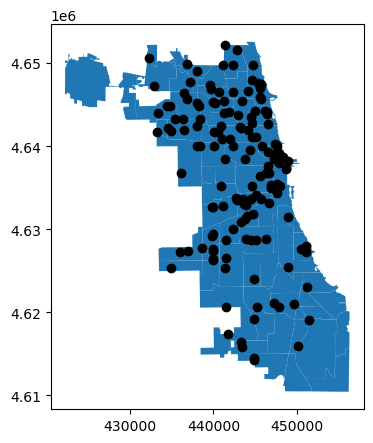

In [35]:
fig, (ax1) = plt.subplots(figsize=(5, 5))
comA.plot(ax=ax1) 

supermarkets.plot(ax=ax1, color="black")

#### Get boundary of Lincoln Park, one of Chicago's largest neighbourhoods, from OpenStreetMap:

# ⓘ 
> Lincoln Park is one of the most attractive (and expensive!) neighbourhoods in Chicago thanks to its proximity to the city center, ample green space, and vibrant atmosphere. 

In [36]:
lp_chicago = ox.geocoder.geocode_to_gdf('Lincoln Park, Chicago', which_result=2)
lp_chicago 

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"MULTIPOLYGON (((-87.65433 41.98744, -87.65433 ...",41.98744,41.893096,-87.611673,-87.654333,299022836,relation,11610689,41.940313,-87.636289,leisure,park,24,0.398043,park,Lincoln Park,"Lincoln Park, Chicago, Lake View Township, Coo..."


#### Re-project lp_chicago to EPSG:26916:

In [37]:
lp_chicago = lp_chicago.to_crs("EPSG:26916")

#### Visualise the Lincoln Park neighbourhood on the map:


<Axes: >

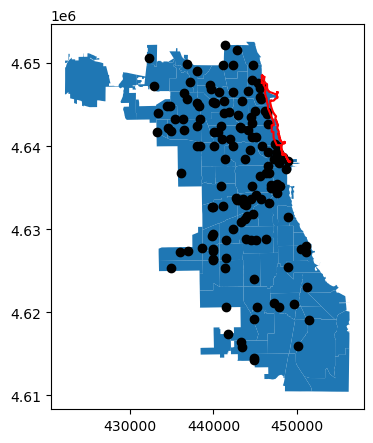

In [38]:
fig, (ax1) = plt.subplots(figsize=(5, 5))
comA.plot(ax=ax1) 
supermarkets.plot(color='black', ax=ax1)
  
lp_chicago.boundary.plot(ax=ax1, color="red")


#### We will now clip the supermarket dataset using the Lincoln Park neighbourhood boundary:

In [40]:
supermarkets_lp = supermarkets.clip(lp_chicago) 

/Users/abhaykumar/anaconda3/envs/sds_python/lib/python3.10/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

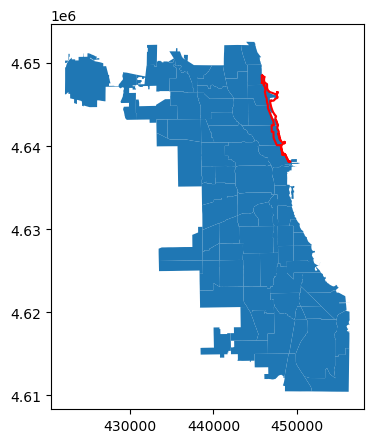

In [41]:
fig, (ax1) = plt.subplots(figsize=(5, 5))
comA.plot(ax=ax1) 

supermarkets_lp.plot(color="black", ax=ax1)

lp_chicago.boundary.plot(ax=ax1, color="red")

#### Re-inspect the Chicago statistics gdf :

In [42]:
comA.head() 

,ComAreaID,community,TRACTCnt,shape_area,shape_len,Pop2012,Pop2014,PopChng,PopM,PopMP,...,InfntMR,LungCancer,ProstateC,Stroke,ChlBLLS,ChlLeadP,GonorrF,GonorrM,Tuberc,geometry
0,35,DOUGLAS,10,4.600462e+07,31027.054510,18238,19430,3.1645,8294,42.6866,...,13.4,74.5,85.5,62.1,482.2,0,1063.3,727.4,4.2,"POLYGON ((449429.784 4632712.179, 449429.106 4..."
1,36,OAKLAND,3,1.691396e+07,19565.506153,5918,6473,4.4791,2499,38.6065,...,8.2,54.5,54.2,43.7,435.4,0,1655.4,1629.3,6.7,"POLYGON ((450818.872 4629619.877, 450805.983 4..."
2,37,FULLER PARK,2,1.991670e+07,25339.089750,2876,2543,-6.1450,1218,47.8962,...,22.6,89.6,70.5,82.4,489.9,2,1061.9,1556.4,0.0,"POLYGON ((447763.073 4627972.081, 447763.300 4..."
3,38,GRAND BOULEVARD,14,4.849250e+07,28196.837157,21929,22531,1.3540,9681,42.9675,...,12.1,63.8,39.0,46.7,590.4,1,1454.6,1680.0,13.2,"POLYGON ((449609.892 4629615.479, 449609.983 4..."
4,39,KENWOOD,7,2.907174e+07,23325.167906,17841,18217,1.0428,8543,46.8958,...,8.9,49.1,46.2,31.5,397.9,0,610.2,549.1,0.0,"POLYGON ((450818.872 4629619.877, 450819.083 4..."


We can see that there are __87__ columns in the Chicago statistics dataset.

#### Re-inspect the supermarket gdf:

In [43]:
supermarkets.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,NaN,MULTIPOINT (445597.902 4647010.229)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,NaN,MULTIPOINT (443304.338 4616374.187)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,NaN,MULTIPOINT (446955.261 4635370.407)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (445654.986 4636419.341)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,NaN,MULTIPOINT (447847.202 4620680.309)


We can see that there are __8__ columns in the supermarkets dataset.

#### Now, we will perform the spatial join with:

The spatial join tool inserts the columns from one feature table to another based on location or proximity. Consider the supermarkets dataset that we have just seen. By running a spatial join, you can transfer the information about the supermarkets to the Chicago gdf that we have been working with. As long as the supermarkets dataset contains location information, any field can be joined to the neighbourhoods listed in the Chicago health and socioeconomic statistics dataset.

You can refer to another example here: https://geopandas.org/en/stable/gallery/spatial_joins.html.


In [45]:
joined_df = gpd.sjoin(comA, supermarkets, how='left', predicate=None)
joined_df.head()

,ComAreaID,community,TRACTCnt,shape_area,shape_len,Pop2012,Pop2014,PopChng,PopM,PopMP,...,Tuberc,geometry,index_right,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category
0,35,DOUGLAS,10,4.600462e+07,31027.054510,18238,19430,3.1645,8294,42.6866,...,4.2,"POLYGON ((449429.784 4632712.179, 449429.106 4...",88.0,369.0,41.832885,-87.623453,OPEN,"443 E 34TH ST, CHICAGO, IL. 60616-4135",JEWEL OSCO,NaN
1,36,OAKLAND,3,1.691396e+07,19565.506153,5918,6473,4.4791,2499,38.6065,...,6.7,"POLYGON ((450818.872 4629619.877, 450805.983 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,FULLER PARK,2,1.991670e+07,25339.089750,2876,2543,-6.1450,1218,47.8962,...,0.0,"POLYGON ((447763.073 4627972.081, 447763.300 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38,GRAND BOULEVARD,14,4.849250e+07,28196.837157,21929,22531,1.3540,9681,42.9675,...,13.2,"POLYGON ((449609.892 4629615.479, 449609.983 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39,KENWOOD,7,2.907174e+07,23325.167906,17841,18217,1.0428,8543,46.8958,...,0.0,"POLYGON ((450818.872 4629619.877, 450819.083 4...",18.0,121.0,41.802441,-87.588208,OPEN,"1521 E HYDE PARK BLVD, CHICAGO, IL. 60615",LEAMINGTON FOODS,NaN


In [46]:
joined_df.loc[joined_df['community'] == "LINCOLN PARK"]

,ComAreaID,community,TRACTCnt,shape_area,shape_len,Pop2012,Pop2014,PopChng,PopM,PopMP,...,Tuberc,geometry,index_right,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category
67,7,LINCOLN PARK,20,8.831640e+07,49478.427771,64116,65951,1.4108,32551,49.3563,...,1.2,"POLYGON ((447618.979 4642483.901, 447618.979 4...",22.0,143.0,41.912018,-87.634591,OPEN,"1639 N WELLS ST, CHICAGO, IL. 60614",TREASURE ISLAND FOODS,NaN
67,7,LINCOLN PARK,20,8.831640e+07,49478.427771,64116,65951,1.4108,32551,49.3563,...,1.2,"POLYGON ((447618.979 4642483.901, 447618.979 4...",30.0,205.0,41.920124,-87.661889,OPEN,"2121 N CLYBOURN, CHICAGO, IL. 60614-4031",TREASURE ISLAND FOODS,NaN
67,7,LINCOLN PARK,20,8.831640e+07,49478.427771,64116,65951,1.4108,32551,49.3563,...,1.2,"POLYGON ((447618.979 4642483.901, 447618.979 4...",144.0,586.0,41.920842,-87.669112,NewLocation,"2112 N Ashland Ave, Chicago IL 60614",Mariano's,NaN
67,7,LINCOLN PARK,20,8.831640e+07,49478.427771,64116,65951,1.4108,32551,49.3563,...,1.2,"POLYGON ((447618.979 4642483.901, 447618.979 4...",43.0,250.0,41.927629,-87.674517,OPEN,"2550 N CLYBOURN AVE, CHICAGO, IL. 60614",JEWEL OSCO,NaN


#### Now, we wanted to find the percentage of Chicago neighbourhoods with at least one supermarket, we can do the following:

1: Establish a df giving us the neighbourhoods in which each supermarket (from the _supermarkets_ dataset) is located.

In [50]:
nbhds_w_supermarkets = joined_df[pd.notna(joined_df.Chain)]

2: Count the number of unique neighbourhoods ('community' column) with at least one supermarket.

In [51]:
nbhds_w_supermarkets = nbhds_w_supermarkets['community'].nunique()

In [52]:
round(nbhds_w_supermarkets/len(comA)*100,0) 

78.0